# CNN Modeli - Basit CNN

**Ad:** Muhammet  
**Soyad:** KABACALI  
**No:** 2112729007  
**GitHub:** https://github.com/MuhammetK315/Proje1_CNNN.git

---

## 1. Gerekli Kütüphaneleri İçe Aktar

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')

print("Kütüphaneler başarıyla yüklendi.")

Kütüphaneler başarıyla yüklendi.


## 2. Veri Setini Yükleme ve Hazırlama

In [10]:
# Veri seti yolunun tanımlanması
dataset_path = 'dataset'
img_size = 128  # Model2 için 128x128 yeterli
batch_size = 32

# Sınıfları al
classes = sorted(os.listdir(dataset_path))
num_classes = len(classes)
print(f"Sınıflar: {classes}")
print(f"Sınıf sayısı: {num_classes}")

# Görüntüleri yükle
images = []
labels = []

for class_idx, class_name in enumerate(classes):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            if img_name.endswith(('.jpg', '.jpeg', '.png', '.JPG', '.PNG')):
                img_path = os.path.join(class_path, img_name)
                try:
                    img = load_img(img_path, target_size=(img_size, img_size))
                    img_array = img_to_array(img) / 255.0
                    images.append(img_array)
                    labels.append(class_idx)
                except Exception as e:
                    print(f"Hata: {img_path} - {e}")

images = np.array(images)
labels = np.array(labels)

print(f"\nToplam görüntü sayısı: {len(images)}")
print(f"Görüntü şekli: {images[0].shape}")

Sınıflar: ['class1', 'class2']
Sınıf sayısı: 2

Toplam görüntü sayısı: 100
Görüntü şekli: (128, 128, 3)


## 3. Veri Setini Eğitim ve Test Setlerine Böl

In [11]:
# %80 eğitim, %20 test
X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, random_state=42, stratify=labels
)

print(f"Eğitim seti boyutu: {X_train.shape}")
print(f"Test seti boyutu: {X_test.shape}")

# Etiketleri one-hot encode et
y_train_encoded = to_categorical(y_train, num_classes)
y_test_encoded = to_categorical(y_test, num_classes)

Eğitim seti boyutu: (80, 128, 128, 3)
Test seti boyutu: (20, 128, 128, 3)


## 4. Basit CNN Modeli Oluştur

**Mimarisi:**
- Conv2D katmanları: 32, 64 filtre
- MaxPooling2D: 2x2
- Dropout: 0.25
- Dense katmanları: 128 nöron

In [12]:
# Sequential model oluştur - GÜÇLENDIRILMIŞ REGULARIZATION
from tensorflow.keras.regularizers import l2

model = Sequential([
    # İlk Conv bloğu
    Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.003),
           input_shape=(img_size, img_size, 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.003)),
    MaxPooling2D((2, 2)),
    Dropout(0.35),  # 0.25 → 0.35
    
    # İkinci Conv bloğu
    Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.003)),
    Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.003)),
    MaxPooling2D((2, 2)),
    Dropout(0.35),  # 0.25 → 0.35
    
    # Flatten ve Dense katmanları
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.003)),
    Dropout(0.5),  # 0.5 kal
    Dense(num_classes, activation='softmax')
])

# Modeli derle - DAHA DÜŞÜK LEARNING RATE
model.compile(
    optimizer=Adam(learning_rate=0.0003),  # 0.001 → 0.0003
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Model oluşturuldu ve derlenmiştir.")
print("\n" + "="*60)
print("MODEL2 GÜÇLENDIRILMIŞ (Overfitting Engelleme)")
print("="*60)
print("✓ L2 Regularization (0.003) eklendi")
print("✓ Dropout: 0.25 → 0.35 artırıldı")
print("✓ Learning rate: 0.001 → 0.0003 (daha yavaş)")
print("✓ Data Augmentation: Eğitim sırasında uygulanacak")
print("="*60)
model.summary()

Model oluşturuldu ve derlenmiştir.

MODEL2 GÜÇLENDIRILMIŞ (Overfitting Engelleme)
✓ L2 Regularization (0.003) eklendi
✓ Dropout: 0.25 → 0.35 artırıldı
✓ Learning rate: 0.001 → 0.0003 (daha yavaş)
✓ Data Augmentation: Eğitim sırasında uygulanacak


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     8,388,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,454,562 (32.25 MB)

 Trainable params: 8,454,562 (32.25 MB)

 Non-trainable params: 0 (0.00 B)

## 5. Modeli Eğit

In [13]:
epochs = 200
batch_size = 32

# Early Stopping
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

# Data Augmentation - RESİMLERLE EĞİT
train_datagen = ImageDataGenerator(
    rotation_range=25,           # ±25 derece döndür
    width_shift_range=0.2,       # ±20% yatay kaydır
    height_shift_range=0.2,      # ±20% dikey kaydır
    horizontal_flip=True,        # Yatay çevir
    vertical_flip=True,          # Dikey çevir
    zoom_range=0.25,             # %25 zoom
    shear_range=0.2,             # Eğilti
    brightness_range=[0.8, 1.2], # Parlaklık değişimi
    fill_mode='nearest'
)

# Eğitim verisine augmentation uygula
train_datagen.fit(X_train)

# Augmented görüntülerle eğit
history = model.fit(
    train_datagen.flow(X_train, y_train_encoded, batch_size=batch_size),
    epochs=epochs,
    validation_data=(X_test, y_test_encoded),
    callbacks=[early_stop],
    steps_per_epoch=len(X_train) // batch_size,
    verbose=1
)

print("\nModel eğitimi tamamlanmıştır.")
print(f"Toplam çalışan epoch sayısı: {len(history.history['loss'])}")
print("\n" + "="*60)
print("MODEL2 DATA AUGMENTATION DETAYLARI")
print("="*60)
print("✓ Rotation: ±25 derece")
print("✓ Width/Height Shift: ±20%")
print("✓ Horizontal/Vertical Flip: EVET")
print("✓ Zoom: 0-25%")
print("✓ Shear: 20%")
print("✓ Brightness: 80%-120%")
print("✓ Toplam Epochs: 200")
print("✓ Early Stopping Patience: 15")
print("="*60)

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 437ms/step - accuracy: 0.3958 - loss: 1.8700 - val_accuracy: 0.4000 - val_loss: 1.7664
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.5625 - loss: 1.7628 - val_accuracy: 0.5000 - val_loss: 1.6982
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 266ms/step - accuracy: 0.4792 - loss: 1.6860 - val_accuracy: 0.5000 - val_loss: 1.5812
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.5625 - loss: 1.5923 - val_accuracy: 0.5000 - val_loss: 1.5284
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 245ms/step - accuracy: 0.5417 - loss: 1.5266 - val_accuracy: 0.5000 - val_loss: 1.4346
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.4375 - loss: 1.4555 - val_accuracy: 0.5000 - val_loss: 1.3920
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 305ms/step - accuracy: 0.4844 - loss: 1.3957 - val_accuracy: 0.5500 - val_loss: 1.3223
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.6250 - loss: 1.3317 - val_accuracy: 0.6000 - val_l

## 6. Eğitim Doğruluk ve Kayıp Grafiklerini Çiz

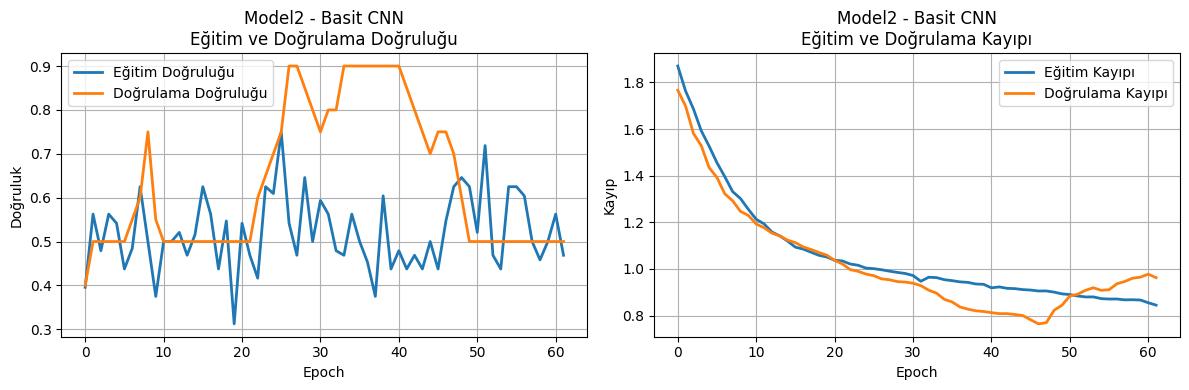

In [14]:
# Doğruluk grafiği
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.title('Model2 - Basit CNN\nEğitim ve Doğrulama Doğruluğu')
plt.legend()
plt.grid(True)

# Kayıp grafiği
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Eğitim Kayıpı', linewidth=2)
plt.plot(history.history['val_loss'], label='Doğrulama Kayıpı', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.title('Model2 - Basit CNN\nEğitim ve Doğrulama Kayıpı')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## 7. Test Seti Doğruluğunu Değerlendir

In [15]:
# Test seti üzerinde değerlendirme
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)

print("\n" + "="*50)
print("MODEL 2 - BASIT CNN SONUÇLARI")
print("="*50)
print(f"Test Seti Kayıpı: {test_loss:.4f}")
print(f"Test Seti Doğruluğu: {test_accuracy*100:.2f}%")
print("="*50)

# Detaylı metrikler
from sklearn.metrics import classification_report, confusion_matrix
y_pred = np.argmax(model.predict(X_test, verbose=0), axis=1)

print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred, target_names=classes))

print("\nKonfüzyon Matrisi:")
print(confusion_matrix(y_test, y_pred))


MODEL 2 - BASIT CNN SONUÇLARI
Test Seti Kayıpı: 0.7650
Test Seti Doğruluğu: 75.00%

Sınıflandırma Raporu:
              precision    recall  f1-score   support

      class1       1.00      0.50      0.67        10
      class2       0.67      1.00      0.80        10

    accuracy                           0.75        20
   macro avg       0.83      0.75      0.73        20
weighted avg       0.83      0.75      0.73        20


Konfüzyon Matrisi:
[[ 5  5]
 [ 0 10]]


## 8. Modeli Kaydet

In [16]:
model.save('model2_simple_cnn.h5')
print("Model başarıyla kaydedilmiştir: model2_simple_cnn.h5")

Model başarıyla kaydedilmiştir: model2_simple_cnn.h5
